(glue)=
(Chap_House)=
# Households


In this section, we describe what is arguably the most important economic agent in the `OG-Core` model: the household. We model households in `OG-Core` rather than individuals, because we want to abstract from the concepts of gender, marital status, and number of children. Furthermore, the household is the usual unit of account in tax data. Because `OG-Core` is primarily a fiscal policy model, it is advantageous to have the most granular unit of account be the household.

<!-- This last sentence will not be true once we start carefully modeling government benefit programs, which focus on individual members of the household. -->

(SecHH_Cons)=
## Household Consumption

  We describe the derivation and dynamics of the population distribution in the {ref}`Chap_Demog` chapter in this documentation and in more detail in the calibration chapter on demographics in the country-specific repository documentation. A measure $\omega_{1,t}$ of households is born each period, become economically relevant at age $s=E+1$ if they survive to that age, and live for up to $E+S$ periods ($S$ economically active periods), with the population of age-$s$ individuals in period $t$ being $\omega_{s,t}$. Let the age of a household be indexed by $s = \{1,2,...E+S\}$.

  At birth, each household age $s=1$ is randomly assigned one of $J$ ability groups, indexed by $j$. Let $\lambda_j$ represent the fraction of individuals in each ability group, such that $\sum_j\lambda_j=1$. Note that this implies that the distribution across ability types in each age is given by $\boldsymbol{\lambda}=[\lambda_1,\lambda_2,...\lambda_J]$. Once an household is born and assigned to an ability type, it remains that ability type for its entire lifetime. This is deterministic ability heterogeneity as described in the calibration chapter on the lifetime earnings process in the country-specific repository documentation. Let $e_{j,s}>0$ be a matrix of ability-levels such that an individual of ability type $j$ will have lifetime abilities of $[e_{j,1},e_{j,2},...e_{j,E+S}]$.

  Individuals in this economy choose how much to work each period $n_{j,s,t}$ and how much to consume among $I$ different consumption goods $c_{i,j,s,t}$. We assume that households aggregate these industry-specific consumption goods in their preferences into a composite consumption good $c_{j,s,t}$ every period in every individual's preferences according to the following Stone-Geary version of a Cobb-Douglas consumption aggregator,
  ```{math}
  :label: EqHHCompCons
    c_{j,s,t} \equiv \prod_{i=1}^I \left(c_{i,j,s,t} - c_{min,i}\right)^{\alpha_i} \quad\forall j,s,t \quad\text{with}\quad \sum_{i=1}^I\alpha_i=1
  ```
  where $c_{min,i}$ is the minimum consumption of good $i$ allowed.[^StoneGeary]

  Assume that the non-normalized price of each individual consumption good is $\tilde{p}_{i,t}$. We can solve for the optimal good-$i$ consumption demands $c_{i,j,s,t}$ as a function of composite consumption $c_{j,s,t}$ by minimizing the total after-tax expenditure on consumption given that individual consumption adds up to composite consumption according to {eq}`EqHHCompCons`. Letting $\tau^{c}_{i,t}$ represent the consumption tax rate on goods of type $i$, the Lagrangian for this expenditure minimization problem is the following.
  ```{math}
  :label: EqHHCostMinLagr}
    \mathcal{L} = \sum_{i=1}^I (1 + \tau^{c}_{i,t})\tilde{p}_{i,t}c_{i,j,s,t} + \lambda_{j,s,t}\Bigl[c_{j,s,t} - \prod_{i=1}^I \left(c_{i,j,s,t} - c_{min,i}\right)^{\alpha_i}\Bigr] \quad\forall j,s,t
  ```
  Because the Lagrangian multiplier on the constraint $\lambda_{j,s,t}$ represents the shadow price of an extra unit of composite consumption, we can relabel it as the price of composite consumption $\tilde{p}_{j,s,t}$.
  ```{math}
  :label: EqHHCostMinLagr2
    \mathcal{L} = \sum_{i=1}^I(1 + \tau^{c}_{i,t}) \tilde{p}_{i,t}c_{i,j,s,t} + \tilde{p}_{j,s,t}\Bigl[c_{j,s,t} - \prod_{i=1}^I \left(c_{i,j,s,t} - c_{min,i}\right)^{\alpha_i}\Bigr] \quad\forall j,s,t
  ```
  Note that the price of composite consumption in period $t$ can be different for each ability-$j$ and age-$s$ individual at this point.

  The $I+1$ first order conditions of this constrained minimization problem are the following $i$ first order conditions {eq}`EqHHFOCci` plus the composite consumption aggregator {eq}`EqHHCompCons`.[^ConsDeriv]
  ```{math}
  :label: EqHHFOCci
    (1 + \tau^{c}_{i,t})\tilde{p}_{i,t} = \alpha_i \tilde{p}_{j,s,t}\left(\frac{c_{j,s,t}}{c_{i,j,s,t} - c_{min,i}}\right) \quad\forall i,j,s,t
  ```
  Solving {eq}`EqHHFOCci` for $c_{i,j,s,t}$ gives the optimal demand function for consumption of good $i$ by ability-$j$ and age-$s$ individual in period $t$.
  ```{math}
  :label: EqHH_ciDem
    c_{i,j,s,t} = \alpha_i\left(\frac{(1 + \tau^{c}_{i,t})\tilde{p}_{i,t}}{\tilde{p}_{j,s,t}}\right)^{-1}c_{j,s,t} + c_{min,i} \quad\forall i,j,s,t
  ```
  This household demand function for good-$i$ shows that $c_{i,j,s,t}$ is a fraction of total composite consumption $c_{j,s,t}$, and that fraction is negatively correlated with the relative price of good-$i$ to the composite good price.

  Substituting the demand equations {eq}`EqHH_ciDem` back into the composite consumption definition {eq}`EqHHCompCons` gives us the expression for the non-normalized composite price $\tilde{p}_{j,s,t}$ as a function of each non-normalized industry-$i$ good price $\tilde{p}_{i,t}$.
  ```{math}
  :label: EqCompPnonnorm
    \tilde{p}_{j,s,t} = \prod_{i=1}^I\left(\frac{(1 + \tau^{c}_{i,t})\tilde{p}_{i,t}}{\alpha_i}\right)^{\alpha_i} \quad\forall j,s,t
  ```
  Because nothing on the right-hand-side of {eq}`EqCompPnonnorm` is a function of $j$ or $s$, then $\tilde{p}_{j,s,t}=\tilde{p}_t$ for all $j$ and $s$.
  ```{math}
  :label: EqCompPnonnorm2
    \tilde{p}_{t} = \prod_{i=1}^I\left(\frac{(1 + \tau^{c}_{i,t})\tilde{p}_{i,t}}{\alpha_i}\right)^{\alpha_i} \quad\forall t
  ```

  Consumption goods are determined from production goods through a fixed $I\times M$ coefficient matrix, $\Pi^I$. Each element, $\pi_{i,m}$, of $\Pi^I$ represents the fraction of good $i$ that is made up of output from industry $m$. It follows that the prices of consumption goods can be expressed as a function of the prices of production goods and the fixed coefficient matrix $\Pi^I$.
  ```{math}
  :label: EqHH_pi
    \tilde{p}_{i,t} = \sum_{m=1}^M \pi_{i,m}\tilde{p}_{m,t} \quad\forall i,t
  ```

 We assume that the production good in industry $M$ is the numeraire.[^Numeraire] We can normalize the composite consumption price $\tilde{p}_t$ and the remaining $M-1$ output goods prices $\tilde{p}_{m,t}$ for $m=1,2,...M-1$ in every period $t$ by dividing all the equations with prices by the industry-$M$ price $\tilde{p}_{M,t}$. Similarly, we can divide through all the consumption good prices in every period, $\tilde{p}_{i,t}$ for $i=1,2,...I$ and rewrite the optimal consumption demand {eq}`EqHH_ciDem` and composite price index {eq}`EqCompPnonnorm2` equations as the following functions of normalized prices,
   ```{math}
    :label: EqHH_pi2
    p_{i,t} = \sum_{m=1}^M \pi_{i,m}p_{m,t} \quad\forall i,t
  ```
  ```{math}
  :label: EqHH_ciDem2
    c_{i,j,s,t} = \alpha_i\left(\frac{(1 + \tau^{c}_{i,t})p_{i,t}}{p_t}\right)^{-1}c_{j,s,t} + c_{min,i} \quad\forall m,j,s,t
  ```
  ```{math}
  :label: EqCompPnorm2
    p_t = \prod_{i=1}^I\left(\frac{(1 + \tau^{c}_{i,t})p_{i,t}}{\alpha_i}\right)^{\alpha_i} \quad\forall t
  ```
  ```{math}
  :label: EqPmPcompNormDef
    \text{where}\quad &p_{m,t} \equiv \frac{\tilde{p}_{m,t}}{\tilde{p}_{M,t}} \quad\forall m, t \quad\Rightarrow\quad p_{M,t} = 1 \quad\forall t \\
    \quad\text{and}\quad  &p_{i,t} \equiv \frac{\tilde{p}_{i,t}}{\tilde{p}_{M,t}} \quad\forall i, t \quad\text{and}\quad p_t \equiv\frac{\tilde{p}_t}{\tilde{p}_{M,t}} \quad\forall t
  ```
  where $p_{i,t}$ and $p_t$ defined in {eq}`EqPmPcompNormDef` are normalized consumption goods prices and normalized composite goods price, respectively, with the $M$th industry good being the numeraire.


(SecHHBC)=
## Budget Constraint

  Because the household's industry-specific demand problem from Section {ref}`SecHH_Cons` is characterized by equations {eq}`EqHHCompCons`, {eq}`EqHH_ciDem2`, and {eq}`EqCompPnorm2` is determined by functions of composite consumption $c_{j,s,t}$ and normalized industry prices $p_t$ and $p_{i,t}$, we can write the individual's utility maximization in terms of composite consumption $c_{j,s,t}$. An ability-$j$ and age-$s$ individual faces the following per-period budget constraint.

  ```{math}
  :label: EqHHBC
    p_t c_{j,s,t} + &\sum_{i=1}^I (1 + \tau^{c}_{i,t})p_{i,t}c_{min,i} + b_{j,s+1,t+1} = \\
    &(1 + r_{p,t})b_{j,s,t} + w_t e_{j,s} n_{j,s,t} + \\
    &\quad\quad\zeta_{j,s}\frac{BQ_t}{\lambda_j\omega_{s,t}} + \eta_{j,s,t}\frac{TR_{t}}{\lambda_j\omega_{s,t}} + ubi_{j,s,t} - T_{j,s,t}  \\
    &\quad\forall j,t\quad\text{and}\quad s\geq E+1 \quad\text{where}\quad b_{j,E+1,t}=0\quad\forall j,t
  ```

  where $c_{j,s,t}$ is consumption, $b_{j,s+1,t+1}$ is savings for the next period, $r_{p,t}$ is the normalized interest rate (return) on household savings invested in the financial intermediary, $b_{j,s,t}$ is current period wealth (savings from last period), $w_t$ is the normalized wage, and $n_{j,s,t}$ is labor supply. Equations {eq}`eq_rK` and {eq}`eq_portfolio_return` of Chapter {ref}`Chap_FinInt` show how the rate of return from the financial intermediary $r_{p,t}$ might differ from the marginal product of capital $r_t$ and from the interest rate the government pays $r_{gov,t}$. Note that we must add in the cost of minimum consumption $c_{min,i}$ for all $i$ because that amount is subtracted out of composite consumption in {eq}`EqHHCompCons`.

  The third term on the right-hand-side of the budget constraint {eq}`EqHHBC` represents the portion of total bequests $BQ_t$ that go to the age-$s$, income-group-$j$ household. Let $\zeta_{j,s}$ be the fraction of total bequests $BQ_t$ that go to the age-$s$, income-group-$j$ household, such that $\sum_{s=E+1}^{E+S}\sum_{j=1}^J\zeta_{j,s}=1$. We must divide that amount by the population of $(j,s)$ households $\lambda_j\omega_{s,t}$. The calibration chapter on beqests in the country-specific repository documentation details how to calibrate the $\zeta_{j,s}$ values from consumer finance data.

  The last three terms on the right-hand-side of the budget constraint {eq}`EqHHBC` have to do with government transfers, universal basic income transfer, and taxes, respectively. $TR_{t}$ is total government transfers to households in period $t$ and $\eta_{j,s,t}$ is the percent of those transfers that go to households of age $s$ and lifetime income group $j$ such that $\sum_{s=E+1}^{E+S}\sum_{j=1}^J\eta_{j,s,t}=1$. This term is divided by the population of type $(j,s)$ households. We assume government transfers to be lump sum, so they do not create any direct distortions to household decisions. Total government transfers $TR_t$ is in terms of the numeraire good, as shown in equation {eq}`EqUnbalGBCtfer` in Chapter {ref}`Chap_UnbalGBC`.

  The term $ubi_{j,s,t}$ the time series of a matrix of universal basic income (UBI) transfers by lifetime income group $j$ and age group $s$ in each period $t$. There is a specification where the time series of this matrix is stationary (growth adjusted) and a specification in which it's stationary value is going to zero in the limit (non-growth-adjusted). The calibration chapter on UBI in the country-specific repository documentation describes the exact way in which this matrix is calibrated from the values of five parameters, household composition data, and OG-Core's demographics. Similar to the transfers term $TR_{t}$, the UBI transfers will not be distortionary.

  The term $T_{j,s,t}$ is the total tax liability of the household in terms of the numeraire good. In contrast to government transfers $tr_{j,s,t}$, tax liability can be a function of labor income $(x_{j,s,t}\equiv w_t e_{j,s}n_{j,s,t})$ and capital income $(y_{j,s,t}\equiv r_{p,t} b_{j,s,t})$. The tax liability can, therefore, be a distortionary influence on household decisions. It becomes valuable to represent total tax liability as an effective tax rate $\tau^{etr}_{s,t}$ function multiplied by total income,

  ```{math}
  :label: EqTaxCalcLiabETR
    T_{j,s,t} = \tau^{etr}_{s,t}(x_{j,s,t}, y_{j,s,t})\left(x_{j,s,t} + y_{j,s,t}\right) \quad\forall j,s,t
  ```

  where the effective tax rate can be a function of both labor income and capital income $\tau^{etr}_{s,t}(x_{j,s,t},y_{j,s,t})$. The calibration chapter on the microsimulation model and tax function estimation in the country-specific repository documentation details exactly how the model estimates these tax functions from microsimulation model data.


(SecHHellipUtil)=
## Elliptical Disutility of Labor Supply

  In `OG-Core`, the period utility function of each household is a function of consumption $c_{j,s,t}$, savings $b_{j,s+1,t+1}$, and labor supply $n_{j,s,t}$.[^sav_util_note] We detail this utility function, its justification, and functional form in Section {ref}`SecHHeulers`. With endogenous labor supply $n_{j,s,t}$, we must specify how labor enters an agent's utility function and what are the constraints. Assume that each household is endowed with a measure of time $\tilde{l}$ each period that it can choose to spend as either labor $n_{j,s,t}\in[0,\tilde{l}]$ or leisure $l_{j,s,t}\in[0,\tilde{l}]$.

  ```{math}
  :label: EqLabConstr
  n_{j,s,t} + l_{j,s,t} = \tilde{l} \quad\forall s, t
  ```

  The functional form for the utility of leisure or the disutility of labor supply has important implications for the computational tractability of the model. One difference of the household's labor supply decision $n_{j,s,t}$ from the consumption decision $c_{j,s,t}$ is that the consumption decision only has a lower bound $c_{j,s,t}\geq 0$ whereas the labor supply decision has both upper and lower bounds $n_{j,s,t}\in[0,\tilde{l}]$. {cite}`EvansPhillips:2017` show that many of the traditional functional forms for the disutility of labor---Cobb-Douglas, constant Frisch elasticty, constant relative risk aversion (CRRA)---do not have Inada conditions on both the upper and lower bounds of labor supply. To solve these in a heterogeneous agent model would require occasionally binding constraints, which is a notoriously difficult computational problem.

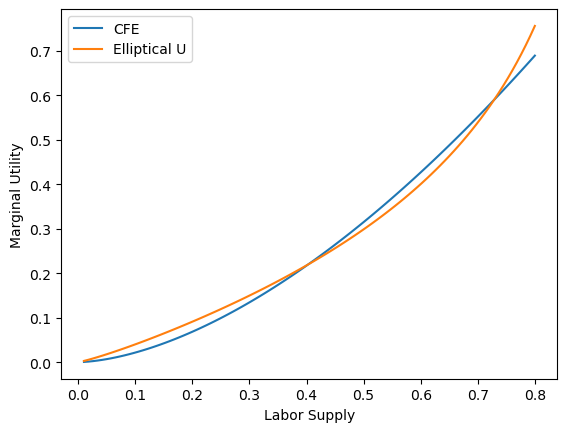

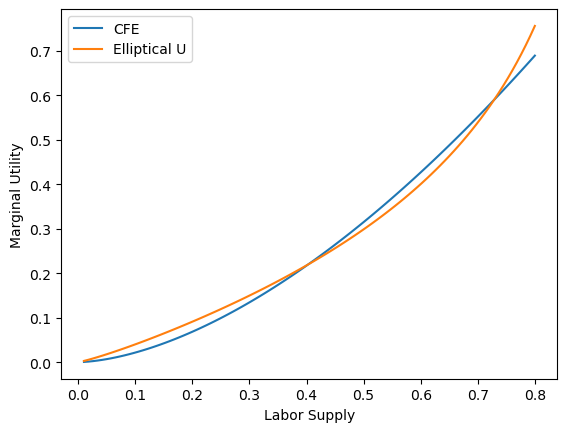

In [1]:
from myst_nb import glue
import ogcore.parameter_plots as pp
from ogcore import Specifications
p = Specifications()
p.update_specifications({'frisch': 0.6})
fig = pp.plot_elliptical_u(p)
glue("labor_utility", fig, display=False)

  ```{figure} ./images/EllipVsCFE_MargUtil.png
  ---
  height: 500px
  name: FigMDUcompar
  ---

  Comparison of CFE marginal disutility of leisure $\theta=1.67$ to fitted elliptical utility
  ```

  {cite}`EvansPhillips:2017` propose using an equation for an ellipse to match the disutility of labor supply to whatever traditional functional form one wants. Our preferred specification in `OG-Core` is to fit an elliptical disutility of labor supply function to approximate a linearly separable constant Frisch elasticity (CFE) functional form. Let $v(n)$ be a general disutility of labor function. A CFE disutility of labor function is the following,

  ```{math}
  :label: EqCFE
  v(n) \equiv \frac{n^{1+\frac{1}{\theta}}}{1+\frac{1}{\theta}}, \quad\theta > 0
  ```

  where $\theta>0$ represents the Frisch elasticity of labor supply. The elliptical disutility of labor supply functional form is the following,

  ```{math}
  :label: EqEllipDisut
  v(n) = -b\left[1 - \left(\frac{n}{\tilde{l}}\right)^\upsilon\right]^{\frac{1}{\upsilon}}, \quad b,\upsilon>0
  ```

  where $b>0$ is a scale parameter and $\upsilon>0$ is a curvature parameter. This functional form satisfies both $v'(n)>0$ and $v''(n)>0$ for all $n\in(0,1)$. Further, it has Inada conditions at both the upper and lower bounds of labor supply $\lim_{n\rightarrow 0}v'(n) = 0$ and $\lim_{n\rightarrow \tilde{l}}v'(n) = -\infty$.

  Because it is the marginal disutility of labor supply that matters for household decision making, we want to choose the parameters of the elliptical disutility of labor supply function $(b,\upsilon)$ so that the elliptical marginal utilities match the marginal utilities of the CFE disutility of labor supply. Figure {numref}`FigMDUcompar` shows the fit of marginal utilities for a Frisch elasticity of $\theta=0.9$ and a total time endowment of $\tilde{l}=1.0$. The estimated elliptical utility parameters in this case are $b=0.527$ and $\upsilon=1.497$.[^frisch_note]

(SecHHeulers)=
## Optimality Conditions

  Households choose lifetime consumption $\{c_{j,s,t+s-1}\}_{s=1}^S$, labor supply $\{n_{j,s,t+s-1}\}_{s=1}^S$, and savings $\{b_{j,s+1,t+s}\}_{s=1}^{S}$ to maximize lifetime utility, subject to the budget constraints and non negativity constraints. The household period utility function is the following.

  ```{math}
  :label: EqHHPerUtil
  u(c_{j,s,t},n_{j,s,t},b_{j,s+1,t+1}) &\equiv \frac{(c_{j,s,t})^{1-\sigma} - 1}{1-\sigma} + e^{g_y t(1-\sigma)}\chi^n_s\biggl(b\left[1 - \left(\frac{n_{j,s,t}}{\tilde{l}}\right)^\upsilon\right]^{\frac{1}{\upsilon}}\biggr) + \\
  &\chi^b_j \rho_s \frac{(b_{j,s+1,t+1})^{1-\sigma} - 1}{1-\sigma} \quad\forall j,t \quad\text{and}\quad E+1 \leq s \leq E+S
  ```

  The period utility function {eq}`EqHHPerUtil` is linearly separable in $c_{j,s,t}$, $n_{j,s,t}$, and $b_{j,s+1,t+1}$. The first term is a constant relative risk aversion (CRRA) utility of consumption. The second term is the elliptical disutility of labor described in Section {ref}`SecHHellipUtil`. The constant $\chi^n_s$ adjusts the disutility of labor supply relative to consumption and can vary by age $s$, which is helpful for calibrating the model to match labor market moments. See the chapters in the Calibration section of this documentation for a discussion of the calibration.

  It is necessary to multiply the disutility of labor in {eq}`EqHHPerUtil` by $e^{g_y(1-\sigma)}$ because labor supply $n_{j,s,t}$ is stationary, but both consumption $c_{j,s,t}$ and savings $b_{j,s+1,t+1}$ are growing at the rate of technological progress (see Chapter {ref}`Chap_Stnrz`). The $e^{g_y(1-\sigma)}$ term keeps the relative utility values of consumption, labor supply, and savings in the same units.

  The final term in the period utility function {eq}`EqHHPerUtil` is the "warm glow" bequest motive. It is a CRRA utility of savings, discounted by the mortality rate $\rho_s$.[^Iort_rates_note]  Intuitively, it signifies the utility a household gets in the event that they don't live to the next period with probability $\rho_s$. It is a utility of savings beyond its usual benefit of allowing for more consumption in the next period. This utility of bequests also has constant $\chi^b_j$ which adjusts the utility of bequests relative to consumption and can vary by lifetime income group $j$. This is helpful for calibrating the model to match wealth distribution moments. See the calibration chapter on beqests in the country-specific repository documentation for a discussion of the calibration. Note that any bequest before age $E+S$ is unintentional as it was bequeathed due an event of death that was uncertain. Intentional bequests are all bequests given in the final period of life in which death is certain $b_{j,E+S+1,t}$.

  The household lifetime optimization problem is to choose consumption $c_{j,s,t}$, labor supply $n_{j,s,t}$, and savings $b_{j,s+1,t+1}$ in every period of life to maximize expected discounted lifetime utility, subject to budget constraints and upper-bound and lower-bound constraints.

  ```{math}
  :label: EqHHmaxprob
    \max_{\{(c_{j,s,t}),(n_{j,s,t}),(b_{j,s+1,t+1})\}_{s=E+1}^{E+S}}\: \sum_{s=1}^S\beta_j^{s-1}\left[\Pi_{u=E+1}^{E+s}(1 - \rho_u)\right]u(c_{j,s,t+s-1},n_{j,s,t+s-1},b_{j,s+1,t+s})
  ```

  ```{math}
  :label: EqHHBC2
    \text{s.t.}\quad &p_t c_{j,s,t} + \sum_{i=1}^I (1 + \tau^{c}_{i,t})p_{i,t}c_{min,i} + b_{j,s+1,t+1} = \\
    &\quad (1 + r_{p,t})b_{j,s,t} + w_t e_{j,s} n_{j,s,t} + \zeta_{j,s}\frac{BQ_t}{\lambda_j\omega_{s,t}} + \eta_{j,s,t}\frac{TR_{t}}{\lambda_j\omega_{s,t}} + ubi_{j,s,t} - T_{s,t} \\
    &\qquad\text{and}\quad c_{j,s,t}\geq 0,\: n_{j,s,t} \in[0,\tilde{l}],\:\text{and}\: b_{j,1,t}=0 \quad\forall j, t, \:\text{and}\: E+1\leq s\leq E+S \nonumber
  ```

  The nonnegativity constraint on consumption does not bind in equilibrium because of the Inada condition $\lim_{c\rightarrow 0}u_1(c,n,b') = \infty$, which implies consumption is always strictly positive in equilibrium $c_{j,s,t}>0$ for all $j$, $s$, and $t$. The warm glow bequest motive in Equation {eq}`EqHHPerUtil` also has an Inada condition for savings at zero, so $b_{j,s,t}>0$ for all $j$, $s$, and $t$. This is an implicit borrowing constraint.[^constraint_note] And note that the discount factor $\beta_j$ has a $j$ subscript for lifetime income group. We use heterogeneous discount factors following {cite}`CarrollEtAl:2017`. And finally, as discussed in Section {ref}`SecHHellipUtil`, the elliptical disutility of labor supply functional form in Equation {eq}`EqHHPerUtil` imposes Inada conditions on both the upper and lower bounds of labor supply such that labor supply is strictly interior in equilibrium $n_{j,s,t}\in(0,\tilde{l})$ for all $j$, $s$, and $t$.

  The household maximization problem can be further reduced by substituting in the household budget constraint, which binds with equality. This simplifies the household's problem to choosing labor supply $n_{j,s,t}$ and savings $b_{j,s+1,t+1}$ every period to maximize lifetime discounted expected utility. The $2S$ first order conditions for every type-$j$ household that characterize the its $S$ optimal labor supply decisions and $S$ optimal savings decisions are the following.

  ```{math}
  :label: EqHHeul_n
    &\frac{w_t e_{j,s}}{p_t}\bigl(1 - \tau^{mtrx}_{s,t}\bigr)(c_{j,s,t})^{-\sigma} = e^{g_y(1-\sigma)}\chi^n_{s}\biggl(\frac{b}{\tilde{l}}\biggr)\biggl(\frac{n_{j,s,t}}{\tilde{l}}\biggr)^{\upsilon-1}\Biggl[1 - \biggl(\frac{n_{j,s,t}}{\tilde{l}}\biggr)^\upsilon\Biggr]^{\frac{1-\upsilon}{\upsilon}} \\
    &\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\forall j,t, \quad\text{and}\quad E+1\leq s\leq E+S \\
  ```

  ```{math}
  :label: EqHHeul_b
    &\frac{(c_{j,s,t})^{-\sigma}}{p_t} = \chi^b_j\rho_s(b_{j,s+1,t+1})^{-\sigma} + \beta_j\bigl(1 - \rho_s\bigr)\left(\frac{1 + r_{p,t+1}\bigl[1 - \tau^{mtry}_{s+1,t+1}\bigr]}{p_{t+1}}\right)(c_{j,s+1,t+1})^{-\sigma} \\
    &\qquad\qquad\qquad\qquad\qquad\qquad\qquad\qquad\forall j,t, \quad\text{and}\quad E+1\leq s\leq E+S-1 \\
  ```

  ```{math}
  :label: EqHHeul_bS
    \frac{(c_{j,E+S,t})^{-\sigma}}{p_t} = \chi^b_j(b_{j,E+S+1,t+1})^{-\sigma} \quad\forall j,t \quad\text{and}\quad s = E+S
  ```

  The distortion of taxation on household decisions can be seen in Euler equations {eq}`EqHHeul_n` and {eq}`EqHHeul_b` in the terms that have a marginal tax rate $(1-\tau^{mtr})$. This comes from the expression for total tax liabilities as a function of the effective tax rate and total income as expressed in Equation {eq}`EqTaxCalcLiabETR`. Using the chain rule, we can break up the derivatives of total tax liability with respect to $n_{j,s,t}$ and $b_{j,s,t}$, respectively, into simpler functions of marginal tax rates. We discuss this in more detail in the calibration chapter on the microsimulation model and tax function estimation in the country-specific repository.

  ```{math}
  :label: EqMTRx_derive
    \frac{\partial T_{s,t}}{\partial n_{j,s,t}}  = \frac{\partial T_{s,t}}{\partial w_t e_{j,s}n_{j,s,t}}\frac{\partial w_{t}e_{j,s}n_{j,s,t}}{\partial n_{j,s,t}} = \frac{\partial T_{s,t}}{\partial w_{t}e_{j,s}n_{j,s,t}}w_t e_{j,s} = \tau^{mtrx}_{s,t}w_t e_{j,s}
  ```

  ```{math}
  :label: EqMTRy_derive
    \frac{\partial T_{s,t}}{\partial b_{j,s,t}} = \frac{\partial T_{s,t}}{\partial r_{p,t}b_{j,s,t}}\frac{\partial r_{p,t} b_{j,s,t}}{\partial b_{j,s,t}} = \frac{\partial T_{s,t}}{\partial r_{p,t} b_{j,s,t}}r_{p,t} = \tau^{mtry}_{s,t}r_{p,t}
  ```


(SecHHincFactor)=
## Factor Transforming Income Units

  The tax functions $\tau^{etr}_{s,t}$, $\tau^{mtrx}_{s,t}$, and $\tau^{mtry}_{s,t}$ are estimated in each country calibration model based on the currency units of the corresponding income data. However, the consumption units of the `OG-Core` model or any of its country calibrations are not in the same units as income data. For this reason, we have to transform the model income units $x$ and $y$ by a $factor$ so that they are in the same units as the income data on which the tax functions were estimated.

  The tax rate functions are each functions of capital income and labor income $\tau(x,y)$. In order to make the tax functions return accurate tax rates associated with the correct levels of income, we multiply the model income $x^I$ and $y^I$ by a $factor$ so that they are in the same units as the real-world income data $\tau(factor\times x^I, factor\times y^I)$. We define the $factor$ such that average steady-state household total income in the model times the $factor$ equals the U.S. data average total income.

  ```{math}
  :label: EqIncFactor
    factor \times \Biggl[\sum_{s=E+1}^{E+S}\sum_{j=1}^J\lambda_j\bar{\omega}_s\left(\bar{w}e_{j,s}\bar{n}_{j,s} + \bar{r}_{hh}\bar{b}_{j,s}\right)\Biggr] = \text{Avg. household inc. in data}
  ```

  We do not know the steady-state wage, interest rate, household labor supply, and savings *ex ante*. So the income $factor$ is an endogenous variable in the steady-state equilibrium computational solution. We hold the factor constant throughout the nonsteady-state equilibrium solution.


(SecHHbequests)=
## The Distribution of Bequests

`OG-Core` allows for two parameterizations of the distribution of bequests.  Users can choose the bequest transmission process through two parameters: `use_zeta` and `zeta`.

If `use_zeta=False`, then bequests from households of lifetime earnings type `j` are distributed equality across households of type `j`.  That is:

   ```{math}
  :label: Eq_bq
    bq_{j,s,t} = \frac{BQ_{j,t}}{\lambda_j \omega_{s,t}}
  ```

   If `use_zeta=True`, then in the distribution of bequests across age and lifetime ability is determined by $\boldsymbol{\zeta}_{t}$, which allocated aggregate bequests across households by age and lifetime income group:

   ```{math}
  :label: Eq_bq_use_zeta
    bq_{j,s,t} = \boldsymbol{\zeta}_{t} BQ_{t}
  ```

(SecHHexp)=
## Expectations

  To conclude the household's problem, we must make an assumption about how the age-$s$ household can forecast the time path of interest rates paid by firms (marginal product of capital), wages, and total bequests $\{r_u, w_u, BQ_u\}_{u=t}^{t+S-s}$ over his remaining lifetime. As we will show in Chapter {ref}`Chap_Eqm`, the equilibrium interest rate paid by firms (marginal product of capital) $r_t$, wage $w_t$, and total bequests $BQ_t$ will be functions of the state vector $\boldsymbol{\Gamma}_t$, which turns out to be the entire distribution of savings in period $t$.

  Define $\boldsymbol{\Gamma}_t$ as the distribution of household savings across households at time $t$.

  ```{math}
  :label: EqSavDist
    \boldsymbol{\Gamma}_t \equiv \bigl\{b_{j,s,t}\bigr\}_{s=E+2}^{E+S} \quad\forall j,t
  ```

  Let general beliefs about the future distribution of capital in period $t+u$ be characterized by the operator $\Omega(\cdot)$ such that:

  ```{math}
  :label: EqBeliefs
    \boldsymbol{\Gamma}^e_{t+u} = \Omega^u\left(\boldsymbol{\Gamma}_t\right) \quad \forall t, \quad u\geq 1
  ```

  where the $e$ superscript signifies that $\boldsymbol{\Gamma}^e_{t+u}$ is the expected distribution of wealth at time $t+u$ based on general beliefs $\Omega(\cdot)$ that are not constrained to be correct. [^nssequilibrium_note]


(SecHHfootnotes)=
## Footnotes

  [^StoneGeary]: This functional form was originally proposed as a utility function by in a short comment by {cite}`Geary:1950` that aggregates differentiated goods into a scalar utility value. It is differentiated from Cobb-Douglas utility by the subsistence consumption amount in each term of the product. This function was further developed and operationalized by {cite}`Stone:1954`.

  [^ConsDeriv]: See section {ref}`SecAppDerivHHcons` in the {ref}`Chap_Deriv` Chapter for the derivation of the household industry-specific consumption demand.

  [^Numeraire]: We can normalize the model by any of the $I$ consumption good prices $\tilde{p}_{i,t}$, any of the $M$ industry-specific princes $\tilde{p}_{m,t}$, or we could normalize the model by the composite good price $\tilde{p}_t$. We choose to normalize by the $M$th industry good price $\tilde{p}_{M,t}$ because that industry is the only one the output of which can be used as investment, government spending, or government debt. Furthermore, this nicely nests the case of one industry in which all the other industries share in consumption is set to zero $\alpha_m=0$ for $m=1,2,...M-1$.

  [^sav_util_note]: Savings enters the period utility function to provide a "warm glow" bequest motive.

  [^frisch_note]: {cite}`Peterman:2016` shows that in a U.S. macro-model that has only an intensive margin of labor supply and no extensive margin and represents a broad composition of individuals supplying labor---such as `OG-Core`---a Frisch elasticity of around 0.9 is probably appropriate. He tests the implied macro elasticity when the assumed micro elasticities are small on the intensive margin but only macro aggregates---which include both extensive and intensive margin agents---are observed.

  [^Iort_rates_note]: See Section the mortality rate section of the calibration chapter on demographics in the country-specific repository documentation for a detailed discussion of mortality rates for the specific country calibration interfacing with `OG-Core`.

  [^constraint_note]: It is important to note that savings also has an implicit upper bound $b_{j,s,t}\leq k$ above which consumption would be negative in current period. However, this upper bound on savings in taken care of by the Inada condition on consumption.

  [^nssequilibrium_note]: In Chapter {ref}`Chap_Eqm` we will assume that beliefs are correct (rational expectations) for the non-steady-state equilibrium in Section {ref}`SecEqlbSSdef`.